# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

Pu Zheng: updated this example to match version for 2018.12.20

## 0.imports

In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections, classes
print(os.getpid())

34972


### 0.1 old info imports, just for checking purposes

In [2]:
# master folder for this dataset:
master_folder = r'Z:\20181022-IMR90_whole-chr21-unique'
# get Folders, Field-of-views
folders, fovs = ia.get_img_info.get_folders(master_folder, feature='H', verbose=True)
# analysis
analysis_folder=master_folder+os.sep+'Analysis'

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 231
- Number of field of views: 50


## 1. Create Cell_Data item

In [28]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)

<module 'ImageAnalysis3.classes' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes.py'>

### 1.0 create cell_data class and load basic info

In [29]:
fov_id = 0
cell_id = 0
# specify initialization parameters:
param = {'data_folder':r'Z:\20181022-IMR90_whole-chr21-unique',
         'fov_id': fov_id,
         'cell_id': cell_id,
         'save_folder':r'Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique',
         'map_folder':r'Z:\20181022-IMR90_whole-chr21-unique\Analysis\distmap',
         'num_threads': 18,
         'temp_folder':r'I:\Unique_Temp',
         'correction_folder':r'Z:\Corrections',
         };

# initialize cell_data class:
a = ia.classes.Cell_Data(param)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 231
- Number of field of views: 50
- Importing csv file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
-- 227 folders are found according to color-usage annotation.


### 1.1 Load more info for cell

In [30]:
# load existing cell_info, dont run for the first time
a._load_from_file('cell_info')
# load segmentation
a._load_segmentation(_type='large', _force=False);
# load drift info
drift = a._load_drift(_size=650, _dynamic=True)

- drift already exists for cell:0, skip


### 1.2 Load and crop images from raw data

In [31]:
unique_ims, unique_ids, unique_channels = a._crop_images('unique',_load_in_ram=True)

- Start cropping unique image
- 1 already exists in unique_ims, skip!
- 2 already exists in unique_ims, skip!
- 3 already exists in unique_ims, skip!
- 5 already exists in unique_ims, skip!
- 6 already exists in unique_ims, skip!
- 4 already exists in unique_ims, skip!
- 8 already exists in unique_ims, skip!
- 9 already exists in unique_ims, skip!
- 7 already exists in unique_ims, skip!
- 11 already exists in unique_ims, skip!
- 12 already exists in unique_ims, skip!
- 10 already exists in unique_ims, skip!
- 14 already exists in unique_ims, skip!
- 15 already exists in unique_ims, skip!
- 13 already exists in unique_ims, skip!
- 17 already exists in unique_ims, skip!
- 18 already exists in unique_ims, skip!
- 16 already exists in unique_ims, skip!
- 20 already exists in unique_ims, skip!
- 21 already exists in unique_ims, skip!
- 19 already exists in unique_ims, skip!
- 23 already exists in unique_ims, skip!
- 24 already exists in unique_ims, skip!
- 22 already exists in unique_ims, s

-- time spent in cropping:0.2101576328277588


### 1.3 Save to file 

In [8]:
#a._save_to_file('all') # save all

a._save_to_file('cell_info') # save all cell_info exclude images
#a._save_to_file('cell_info', _save_dic={'distance_zxy':a.distance_zxy}) # save specifically this variable

#a._save_to_file('unique') # save unique info into unique_rounds.npz

#a._save_to_file('combo') # save combo_groups into Harry's format

- Save cell_info to: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cell_id', 'channels', 'color_dic', 'correction_folder', 'dapi_channel_index', 'dapi_im', 'data_folder', 'distance_reference', 'distance_zxy', 'drift', 'drift_folder', 'encoding_colors', 'encoding_group_nums', 'encoding_scheme', 'folders', 'fov_id', 'fovs', 'hyb_per_group', 'map_folder', 'reg_per_group', 'save_folder', 'segmentation_folder', 'segmentation_label', 'sigma_zxy', 'temp_folder', 'use_dapi']
- Writing cell data to file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\cell_info.pkl


## 2. Generate and Pick chromosome

### 2.1 generate and identify chromosome

In [ ]:
# generate
a._generate_chromosome_image('unique')
# identify
a._identify_chromosomes();
# manually pick for only this cell
a._pick_chromosome_manual()

# then do manual picking and close the matplotlib notebook inferface.

### 2.2 Update chromosome coordinate info

In [34]:
a._update_chromosome_from_file();

-- 2 loaded


## 3. Fitting and picking spots for unique images

### 3.1 Load unique images

In [32]:
# unique
a._load_from_file('unique', _overwrite=False)

- Loading unique from file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\unique_rounds.npz


### 3.2 multi-fitting

In [33]:
cand_spots = a._multi_fitting_for_chromosome(_type='unique', _num_threads=20, _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-7, _save=False)
#cand_spots = a._multi_fitting(_type='unique', _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-6)

+ Start multi-fitting for unique images
++ start fitting unique for fov:0, cell:0 with 20 threads
++ total time in fitting unique: 27.840763568878174


### 3.3 picking spots by intensity

In [35]:
naive_picked_pts = a._naive_picking_spots('unique', _save=False)

+ Pick unique spots for by brightness in fov:0, cell:0


#### 3.2.1 distance map for one chromosome

In [36]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 0;
print(f"chromosome id:{chrom_id}, coordinate:{a.chrom_coords[chrom_id]}");
# extract coordinates
coords_in_pxl = np.stack([s[1:4] for s in naive_picked_pts[chrom_id]]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * a.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))

chromosome id:0, coordinate:[ 13.55489277 110.2539412  203.58713251]


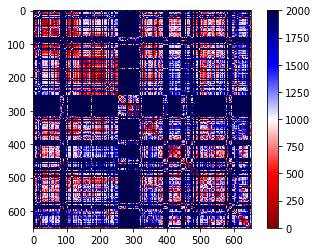

In [41]:
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=0, vmax=2000)
plt.colorbar()

### 3.4 dynamic picking spots

In [38]:
dynamic_picked_pts = a._dynamic_picking_spots('unique', _w_dist=2)

+ Pick unique spots for by brightness in fov:0, cell:0
- Save cell_info to: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\cell_info.pkl


++ generate unique dist-map for fov:0, cell:0, chrom:0


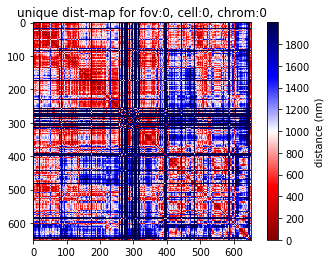

++ generate unique dist-map for fov:0, cell:0, chrom:1


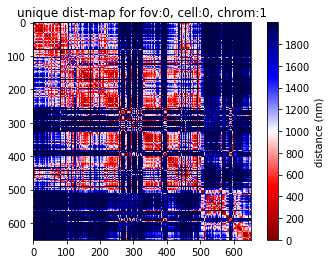

- Save cell_info to: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map']
- Writing cell data to file: Z:\20181022-IMR90_whole-chr21-unique\Analysis\unique\fov-0\cell-0\cell_info.pkl


In [39]:
distmaps = a._generate_distance_map('unique',_limits=[0,2000])

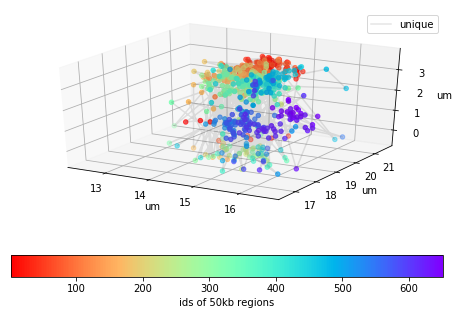

In [40]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = Axes3D(fig)
du_pts = np.array(dynamic_picked_pts[1])[:,1:4]*a.distance_zxy/1000
#dd_pts = np.array(dynamic_decoded_pts[0])[:,1:4][277:325]*a.distance_zxy

du_pts = du_pts[:]
#dd_pts = dd_pts[30:]
sc = ax.scatter3D(du_pts[:,1], du_pts[:,2],du_pts[:,0], c=np.array(a.unique_ids), cmap='rainbow_r')
ax.plot(du_pts[:,1], du_pts[:,2],du_pts[:,0], label='unique', alpha=0.1, color='black')
#ax.plot(dd_pts[:,1], dd_pts[:,2],dd_pts[:,0], label='decoded', alpha=0.5)
plt.legend()
plt.xlabel('um')
plt.ylabel('um')
ax.set_zlabel('um')
cb = plt.colorbar(sc,ticks=np.arange(0,651,100),orientation="horizontal")
cb.set_label('ids of 50kb regions')
